# Documnet Splitting
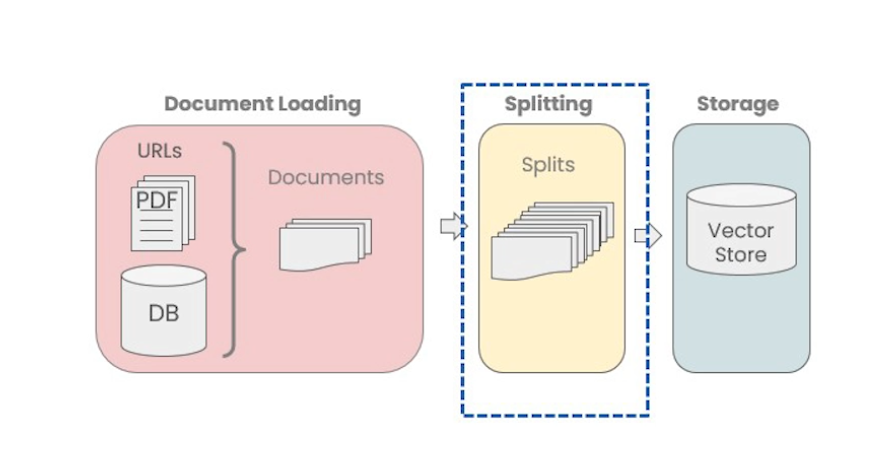

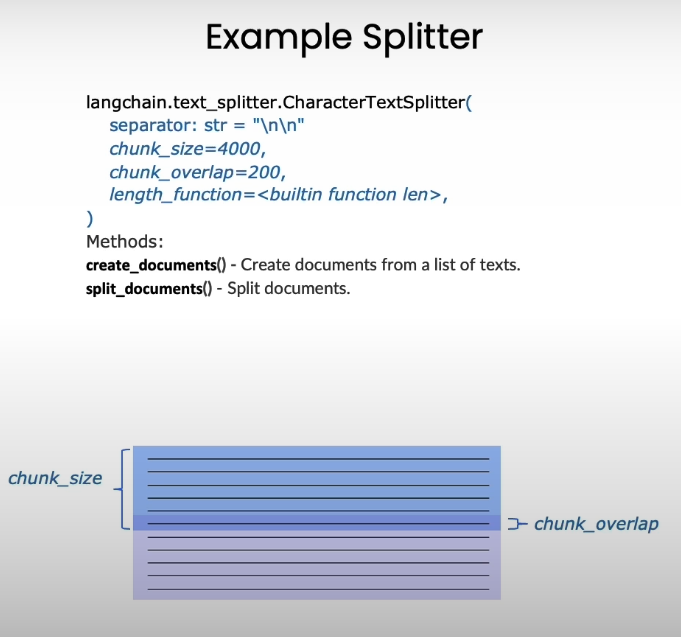

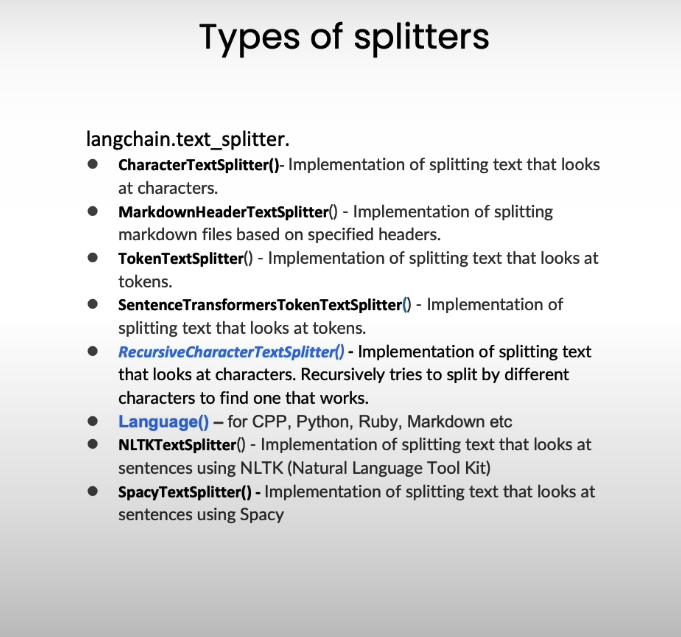

In [1]:
from dotenv import load_dotenv
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [2]:
#Extract Data From the PDF File
def load_pdf_file(data):
    loader= DirectoryLoader(data,
                            glob="*.pdf",
                            loader_cls=PyPDFLoader)

    documents=loader.load()

    return documents

In [3]:
extracted_data=load_pdf_file(data='Data/')

In [4]:
extracted_data[0]

Document(metadata={'source': 'Data/MachineLearning-Lecture01.pdf', 'page': 0}, page_content='MachineLearning-Lecture01  \nInstructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is just spend a little time going over the logistics \nof the class, and then we\'ll start to talk a bit about machine learning.  \nBy way of introduction, my name\'s Andrew Ng and I\'ll be instructor for this class. And so \nI personally work in machine learning, and I\'ve worked on it for about 15 years now, and \nI actually think that machine learning is the most exciting field of all the computer \nsciences. So I\'m actually always excited about teaching this class. Sometimes I actually \nthink that machine learning is not only the most exciting thing in computer science, but \nthe most exciting thing in all of human endeavor, so maybe a little bias there.  \nI also want to introduce the TAs, who are all graduate students doing research in or \nre

In [5]:
#Split the Data into Text Chunks
def text_split(extracted_data):
    text_splitter=RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=20)
    text_chunks=text_splitter.split_documents(extracted_data)
    return text_chunks

In [6]:
text_chunks=text_split(extracted_data)
print("Length of Text Chunks", len(text_chunks))

Length of Text Chunks 139


# From the Tutorial

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [8]:
chunk_size =13
chunk_overlap = 4

In [9]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [10]:
text1 = 'abcdefghijklmnopqrstuvwxyz'
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [11]:
r_splitter.split_text(text1)

['abcdefghijklm', 'jklmnopqrstuv', 'stuvwxyz']

In [12]:
r_splitter.split_text(text2)

['abcdefghijklm', 'jklmnopqrstuv', 'stuvwxyzabcde', 'bcdefg']

In [13]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

In [14]:
r_splitter.split_text(text3)

['a b c d e f g',
 'f g h i j k',
 'j k l m n o',
 'n o p q r s',
 'r s t u v w',
 'v w x y z']

In [15]:
c_splitter.split_text(text3)

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

In [16]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' '
)
c_splitter.split_text(text3)

['a b c d e f g',
 'f g h i j k l',
 'k l m n o p q',
 'p q r s t u v',
 'u v w x y z']

## Recursive splitting details

`RecursiveCharacterTextSplitter` is recommended for generic text. 

In [17]:
len(extracted_data)

22

In [19]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=500, 
    chunk_overlap=20,
    
)
text_chunks=text_splitter.split_documents(extracted_data)

In [20]:
len(text_chunks)

139

In [21]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [22]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=20, 
    separators=["\n\n", "\n", " ", ""]
)

In [25]:
c_splitter.split_text(some_text)

['When writing documents, writers will use document structure to group content. This can convey to the reader, which idea\'s are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,',
 'have a space.and words are separated by space.']

In [24]:
print(c_splitter.split_text(some_text))

['When writing documents, writers will use document structure to group content. This can convey to the reader, which idea\'s are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,', 'have a space.and words are separated by space.']


In [26]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "\. ", " ", ""]
)
r_splitter.split_text(some_text)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_192935/158012430.py:4: SyntaxWarning: invalid escape sequence '\.'
  separators=["\n\n", "\n", "\. ", " ", ""]


["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,",
 'closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this',
 'string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [27]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)
r_splitter.split_text(some_text)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_192935/2945222903.py:4: SyntaxWarning: invalid escape sequence '\.'
  separators=["\n\n", "\n", "(?<=\. )", " ", ""]


["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,",
 'closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this',
 'string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [29]:
loader = PyPDFLoader("Data/MachineLearning-Lecture01.pdf")
pages = loader.load()

In [30]:
text_splitter = CharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=20,
    separator = '\n',
    length_function=len
)

In [31]:
docs = text_splitter.split_documents(pages)

In [32]:
len(docs)

139

In [33]:
len(pages)

22

## Token splitting

We can also split on token count explicity, if we want.

This can be useful because LLMs often have context windows designated in tokens.

Tokens are often ~4 characters.

In [34]:
from langchain.text_splitter import TokenTextSplitter

In [35]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [36]:
text1 = "foo bar bazzyfoo"

In [37]:
text_splitter.split_text(text1)

['foo', ' bar', ' b', 'az', 'zy', 'foo']

In [39]:
text_splitter = TokenTextSplitter(chunk_size=10,chunk_overlap=0)

In [40]:
docs = text_splitter.split_documents(pages)

In [41]:
docs[0]

Document(metadata={'source': 'Data/MachineLearning-Lecture01.pdf', 'page': 0}, page_content='MachineLearning-Lecture01  \n')

In [42]:
pages[0].metadata

{'source': 'Data/MachineLearning-Lecture01.pdf', 'page': 0}

## Context aware splitting

Chunking aims to keep text with common context together.

A text splitting often uses sentences or other delimiters to keep related text together but many documents (such as Markdown) have structure (headers) that can be explicitly used in splitting.

We can use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as show below.

In [43]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [44]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

In [45]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [46]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [47]:
md_header_splits[0]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'}, page_content='Hi this is Jim  \nHi this is Joe')